In [15]:
import torch
import math

seq_len = 256
d_model = 512

## Create a matrix of shape (seq_len,d_model) to store PE
pe = torch.zeros(seq_len,d_model)

## Create a vector of shape (seq_len,1) representing position of words inside a sentence
position = torch.arange(0,seq_len,dtype=torch.float).unsqueeze(1) ## (seq_len,1)

div_term = torch.exp(torch.arange(0,d_model,2).float() * (-math.log(10000.0)/d_model))  ## the divisible term is same but we have used log to get numerical stability

## Apply the sin to even position
pe[:,0::2] = torch.sin(position * div_term) ## pe[:,0;:2] means all rows and columns are 0,2,4,6,8,10

## Apply cos to odd position
pe[:,1::2] = torch.cos(position * div_term) ## ## pe[:,1;:2] means all rows and columns are 1,3,5,7,9

# pe = pe.unsqueeze(0) ## (1,seq_len,d_model) bcoz we will input batch of sequences here, so unsqueezed in 0 position

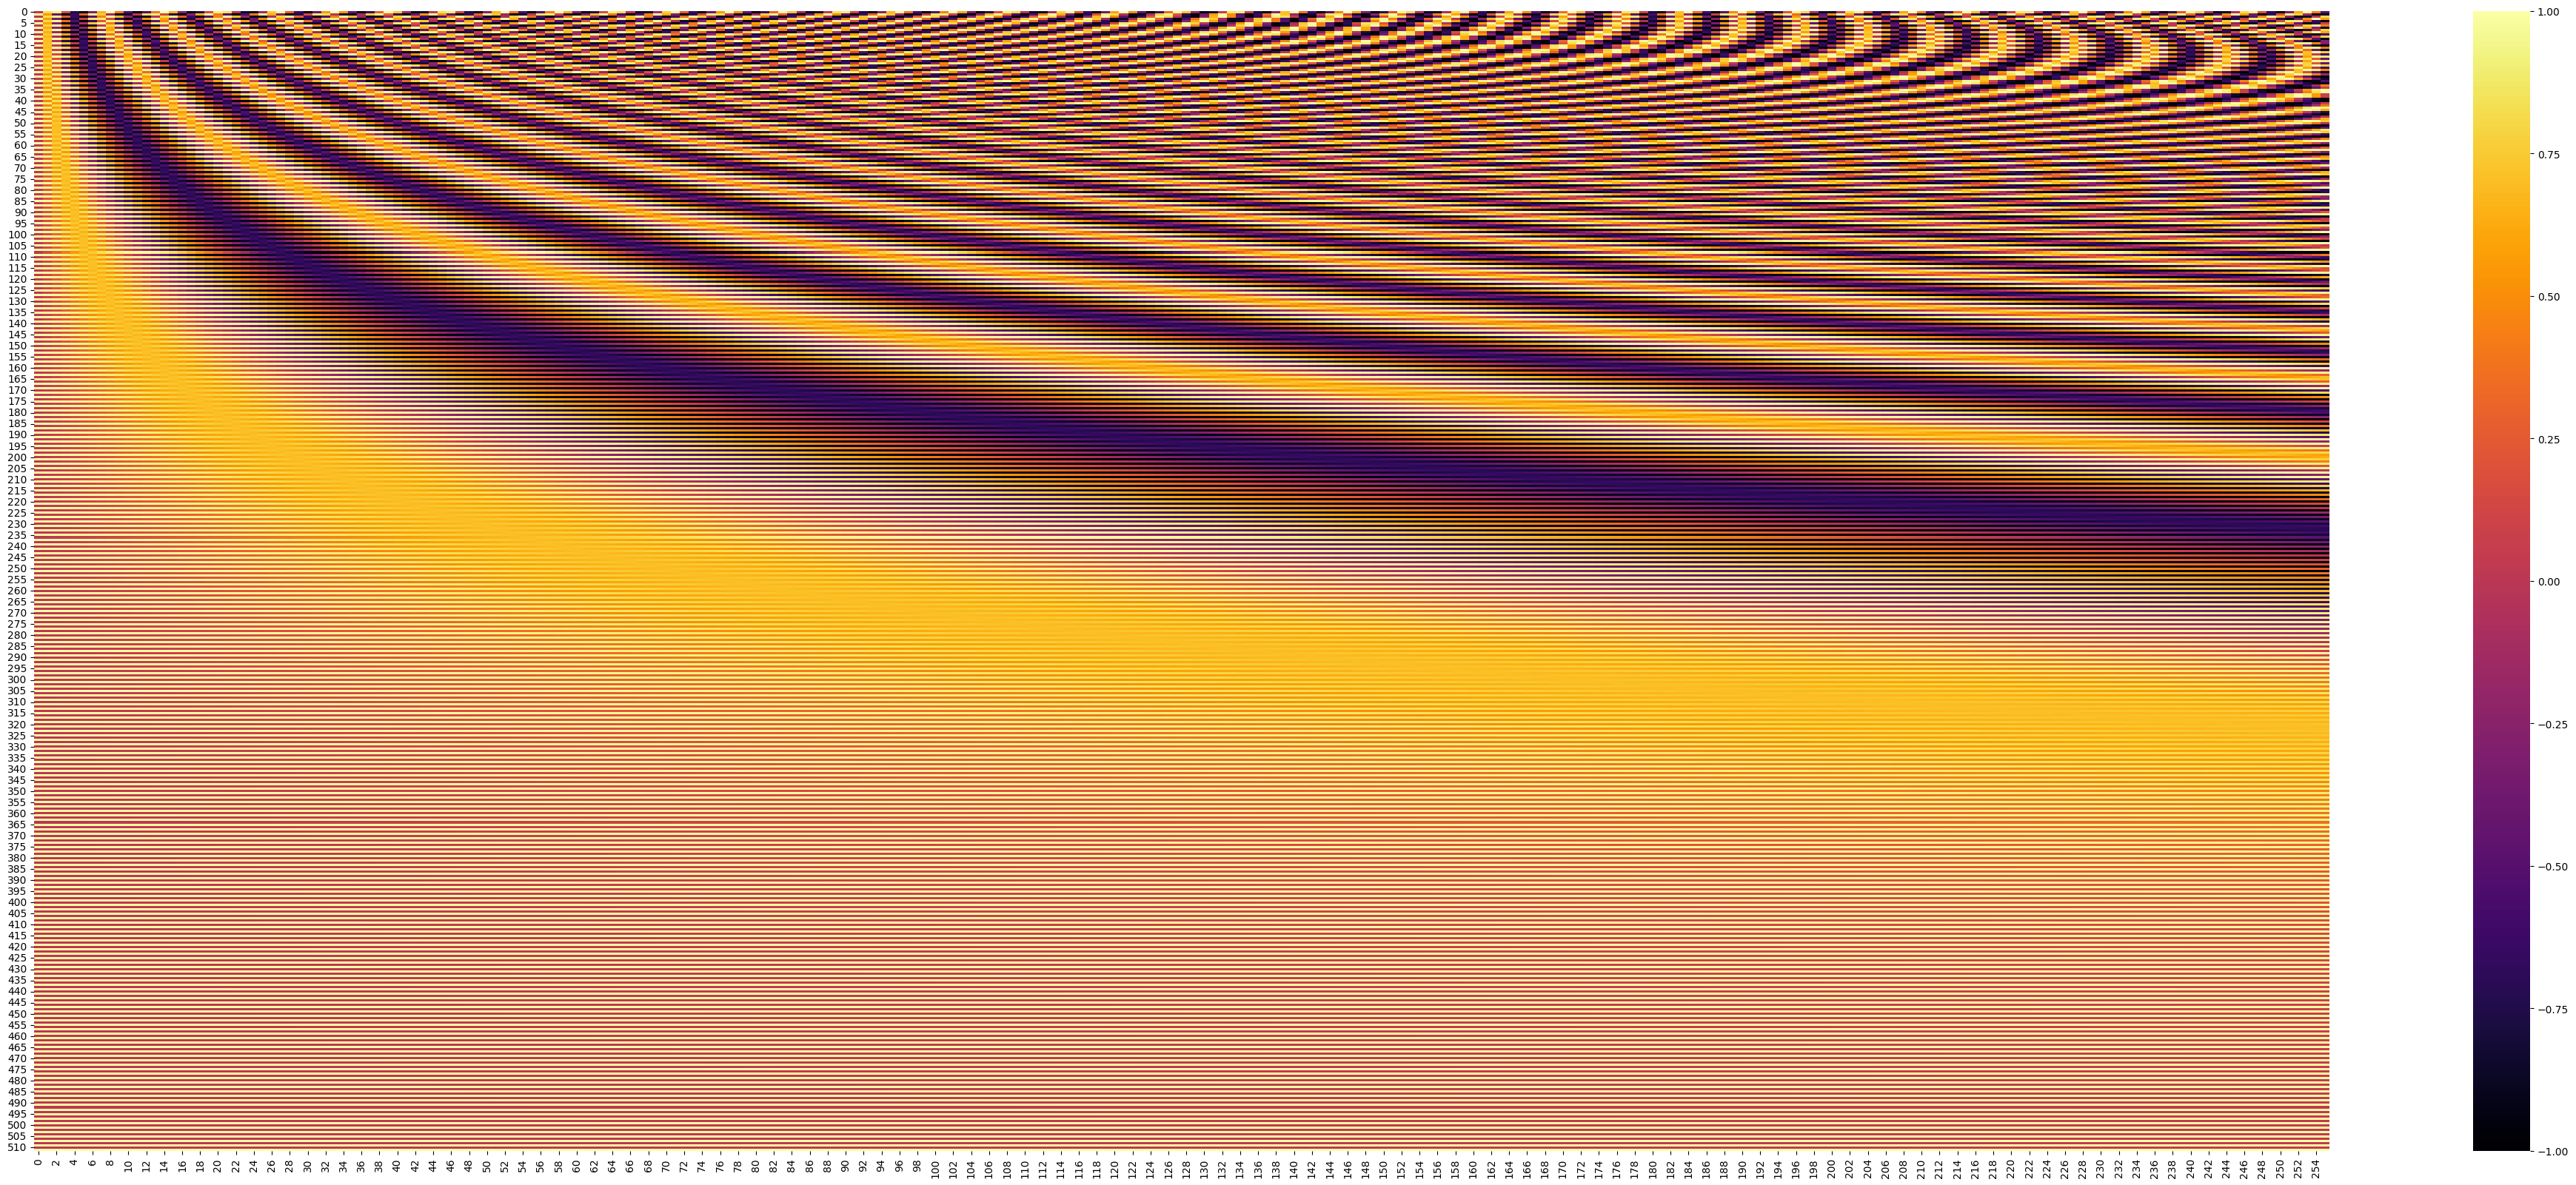

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
sns.heatmap(pe.T, cmap='inferno')
plt.show()

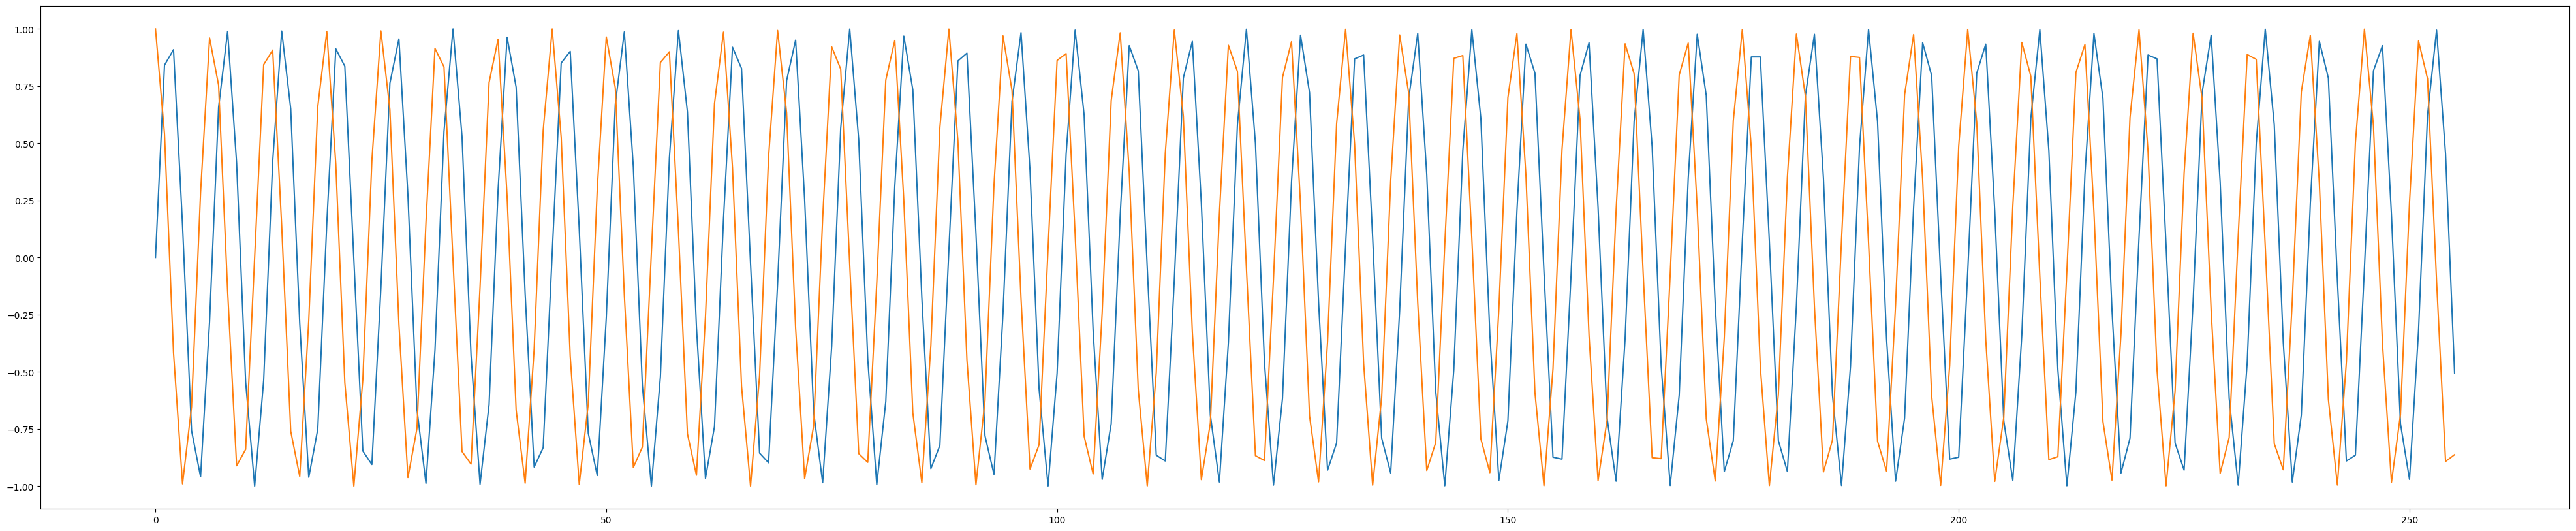

In [17]:
x = pe[:,0]
plt.figure(figsize=(50,10))
plt.plot(range(seq_len),pe[:,0])
plt.plot(range(seq_len),pe[:,1])
plt.show()
